<a href="https://colab.research.google.com/github/timaZhuk/ml-native-algorithms/blob/main/DLModelPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
## link to train.csv dataset
* https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
path_train='/content/drive/MyDrive/trainMNiST.csv'

In [ ]:
data = pd.read_csv(path_train)

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert pandas to numpy array

In [ ]:
data = np.array(data)

In [ ]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

## extract dimensions from data set

In [ ]:
m, n = data.shape # m=42000 (number of examples), n=784+1 -- (pixels + 1col labels)
print(data.shape)

(42000, 785)


## Shuffle the data

In [ ]:
np.random.shuffle(data)

## Get 1000 sample Transpose matrix
### (n-pixels, m-examples)

In [ ]:
data_dev = data[0:1000].T
data_dev.shape

(785, 1000)

In [ ]:
Y_dev = data_dev[0] # label 0 - row (actual numbers 0....9)
X_dev = data_dev[1:n] # number of features that we need to test rows = 784
# normalization pixels from 0....255 then we divide them on 255
X_dev =X_dev/255.

In [ ]:
X_dev

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Train data split

In [ ]:
# last 1000:m training samples that we would train
data_train = data[1000:m].T # n = rows, m - columns in transposed matrix
Y_train = data_train[0] # label row (actual numbers)
X_train = data_train[1:n] # number of features we need to train (784 rows)
X_train = X_train/255.
_,m_train = X_train.shape




In [ ]:
# First column
X_train[:, 0].shape

(784,)

## Initialize Parameters: Weight, biases randomly


In [ ]:
def init_params():
  # 0 layer (input layer #1)
  W1 = np.random.randn(10, 784)
  b1 = np.random.randn(10, 1)
  # 1 layer (inner layer #2 second)
  W2 = np.random.randn(10,10)
  b2 = np.random.randn(10, 1)
  return W1, b1, W2, b2

In [ ]:
# element wise (if el < 0 return 0,
# else el > 0 return Z)
def ReLU(Z):
  return np.maximum(Z, 0)

In [ ]:
# SOFTMAX function summation each element in cilumn
def softmax(Z):
  return np.exp(Z)/sum(np.exp(Z))

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

## One-hot coding of Y output matrix (m, 1)


In [ ]:
# convert m - examples (rows), 1 - column (real number 0--9)
# to 10 rows with m-columns
def one_hot(Y):
  # creating 0-filled matrix (m-exmples, 10-columns)
  # Y.max()+1 = 9 + 1 = 10
  # Y.size = m (number of examples)
  one_hot_Y = np.zeros((Y.size, Y.max()+1)) # (m, 10)
  # go throug the m rows and where Y == number (0...9) we put 1 (100%)
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T #(10, m)
  return one_hot_Y


In [ ]:
one_hot(Y_train)

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
one_hot(Y_train).shape

(10, 41000)

In [ ]:
# derivative of ReLU function
# slope of ReLU 1 (x > 0) and 0 (x =< 0)
# 1(True) if Z > 0, 0(false) if Z < 0
def deriv_ReLU(Z):
  return Z > 0

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  #m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = (1/m)*(dZ2.dot(A1.T))
  db2 = (1/m)*(np.sum(dZ2))
  dZ1 = (W2.T).dot(dZ2)*deriv_ReLU(Z1)
  dW1 = (1/m)*(dZ1.dot(X.T))
  db1 = (1/m)*(np.sum(dZ1))
  return dW1, db1, dW2, db2

##Updating  Parameters


In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2
  return W1, b1, W2, b2


In [ ]:
#
def get_predictions(A2):
  return np.argmax(A2, 0)


In [ ]:
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/Y.size

In [ ]:
# Gradient descent
def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i%50 == 0:
      print("Iterations: ", i)
      predictions = get_predictions(A2)
      print("Accuracy: ", get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 700)

Iterations:  0
[8 8 3 ... 3 1 3] [3 2 0 ... 7 0 9]
Accuracy:  0.09385365853658537
Iterations:  50
[2 8 1 ... 8 8 8] [3 2 0 ... 7 0 9]
Accuracy:  0.175390243902439
Iterations:  100
[2 8 1 ... 8 8 8] [3 2 0 ... 7 0 9]
Accuracy:  0.2115609756097561
Iterations:  150
[2 8 1 ... 8 8 8] [3 2 0 ... 7 0 9]
Accuracy:  0.24907317073170732
Iterations:  200
[2 8 1 ... 8 8 8] [3 2 0 ... 7 0 9]
Accuracy:  0.27887804878048783
Iterations:  250
[2 8 1 ... 8 8 8] [3 2 0 ... 7 0 9]
Accuracy:  0.30646341463414634
Iterations:  300
[2 8 1 ... 8 0 8] [3 2 0 ... 7 0 9]
Accuracy:  0.33078048780487807
Iterations:  350
[2 2 1 ... 8 0 7] [3 2 0 ... 7 0 9]
Accuracy:  0.35124390243902437
Iterations:  400
[2 2 3 ... 8 0 7] [3 2 0 ... 7 0 9]
Accuracy:  0.3702682926829268
Iterations:  450
[2 2 3 ... 8 0 7] [3 2 0 ... 7 0 9]
Accuracy:  0.387
Iterations:  500
[2 2 3 ... 8 0 7] [3 2 0 ... 7 0 9]
Accuracy:  0.40131707317073173
Iterations:  550
[2 2 3 ... 8 0 7] [3 2 0 ... 7 0 9]
Accuracy:  0.41629268292682925
Iterations:  

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
  _, _,_, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_predictions(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(current_image, W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("label: ", label)

  current_image = current_image.reshape((28, 28))*255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [1]
label:  1


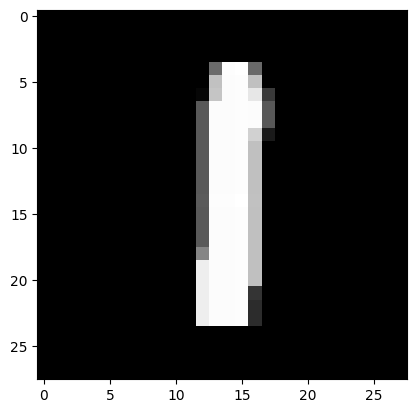

In [ ]:
test_predictions(70, W1, b1, W2, b2)